Saving Data - US.csv to Data - US (2).csv
      CountryName CountryCode RegionName RegionCode Jurisdiction       Date  \
60  United States         USA        NaN        NaN    NAT_TOTAL 2020-03-01   
61  United States         USA        NaN        NaN    NAT_TOTAL 2020-03-02   
62  United States         USA        NaN        NaN    NAT_TOTAL 2020-03-03   
63  United States         USA        NaN        NaN    NAT_TOTAL 2020-03-04   
64  United States         USA        NaN        NaN    NAT_TOTAL 2020-03-05   

    C1M_School closing  C2M_Workplace closing  C3M_Cancel public events  \
60                   0                      0                         1   
61                   0                      0                         1   
62                   0                      0                         1   
63                   0                      0                         1   
64                   3                      0                         1   

    C4M_Restrictions on gatherin

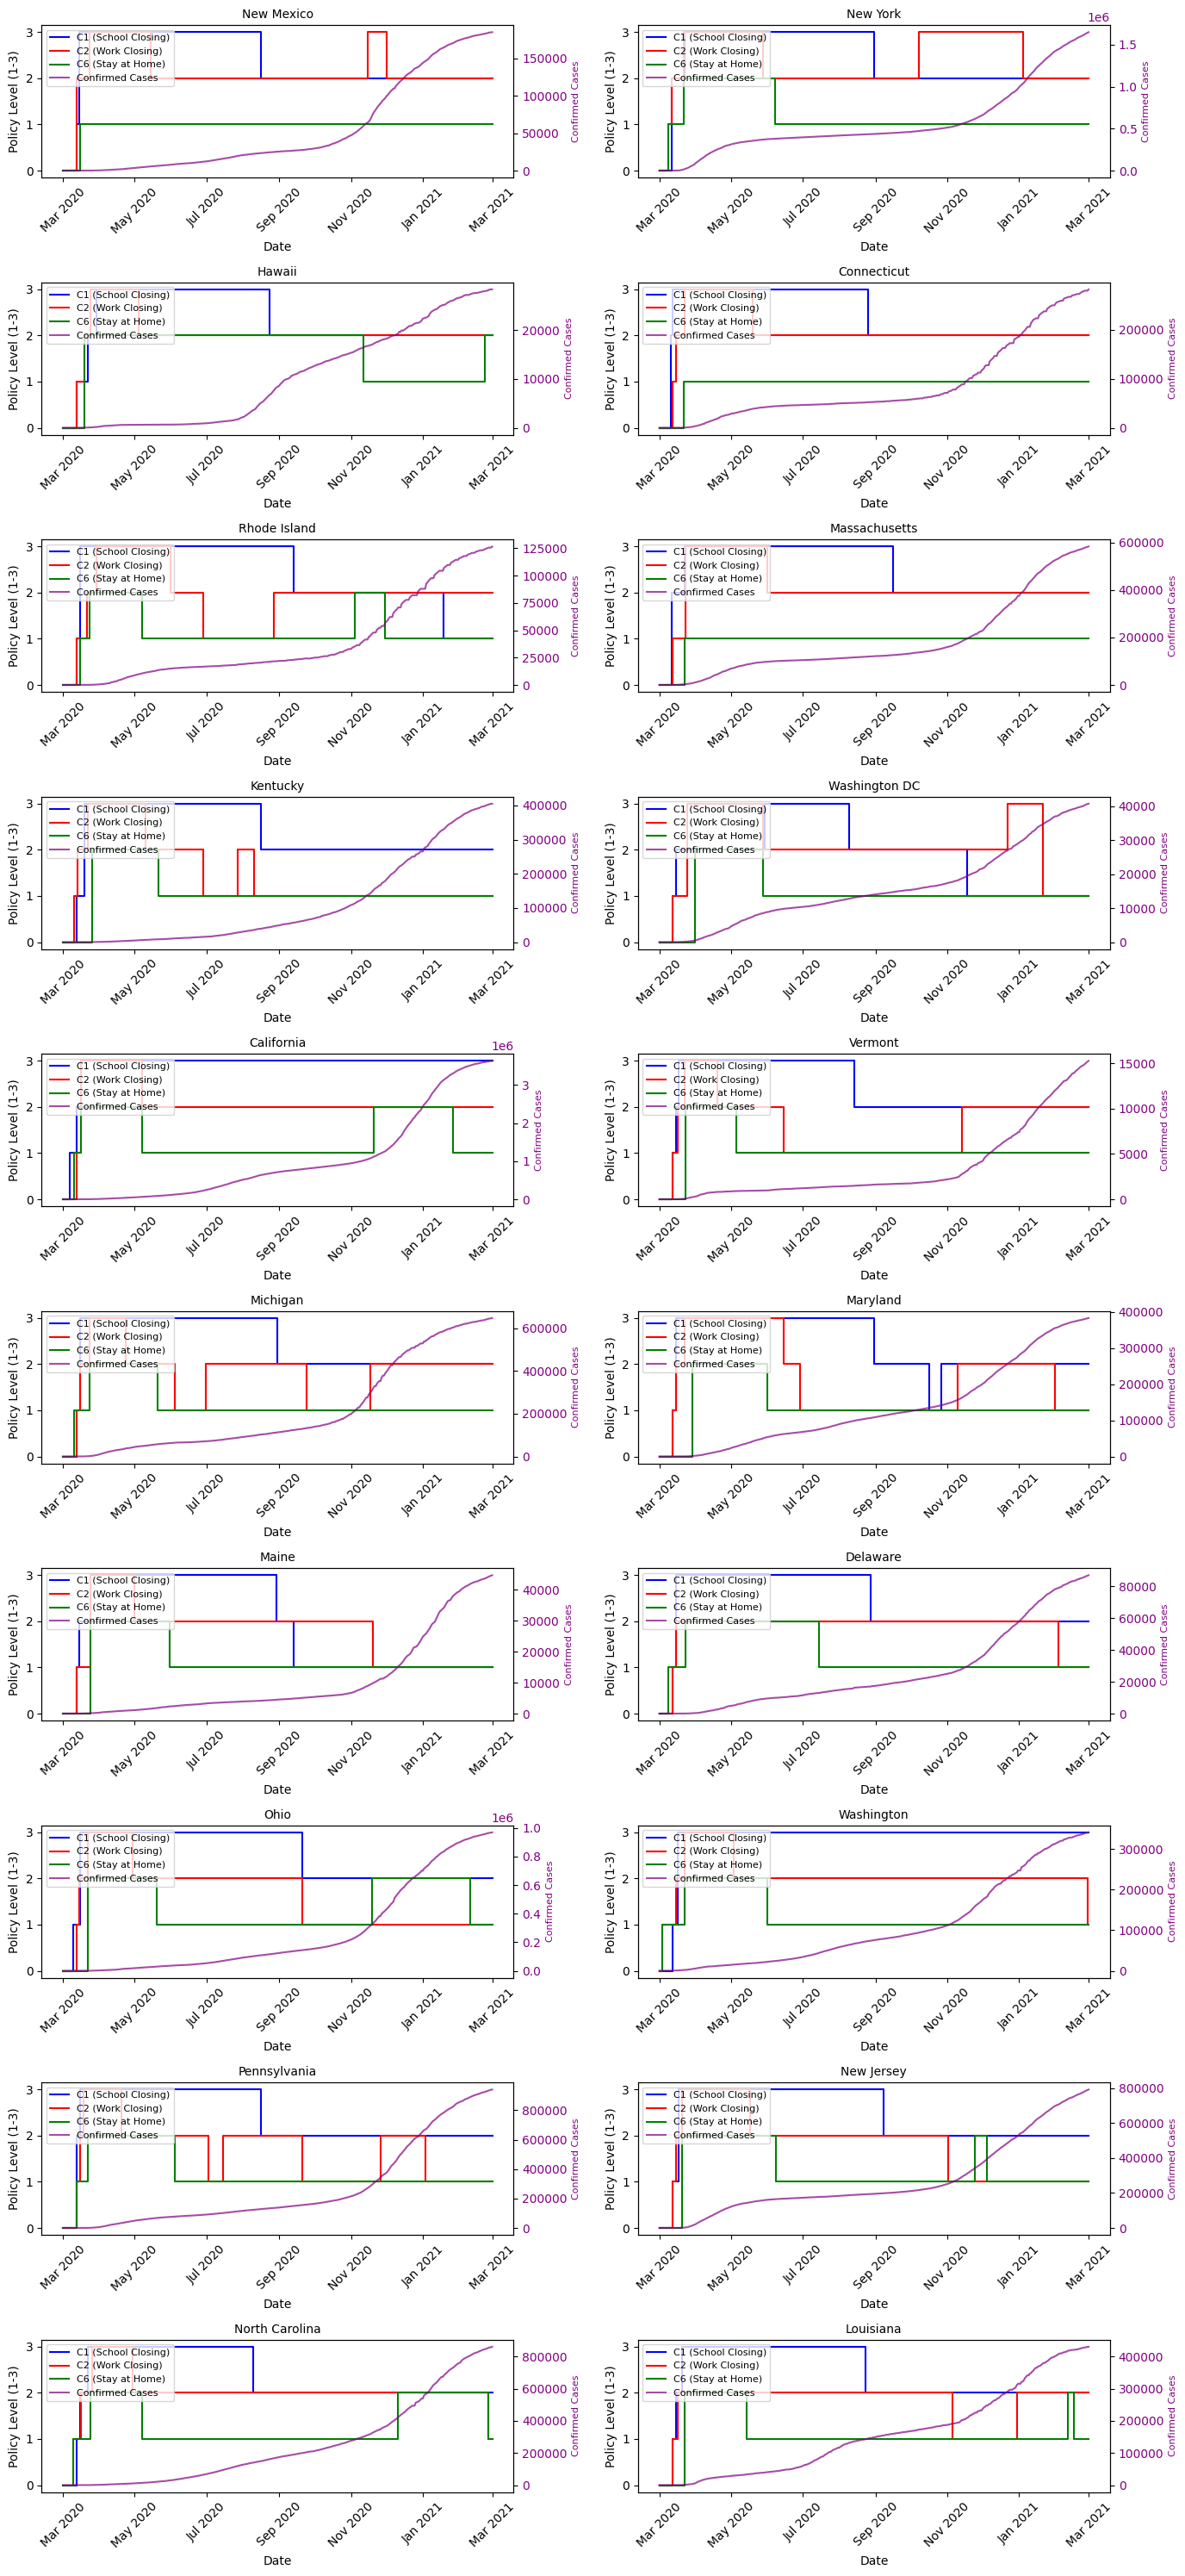

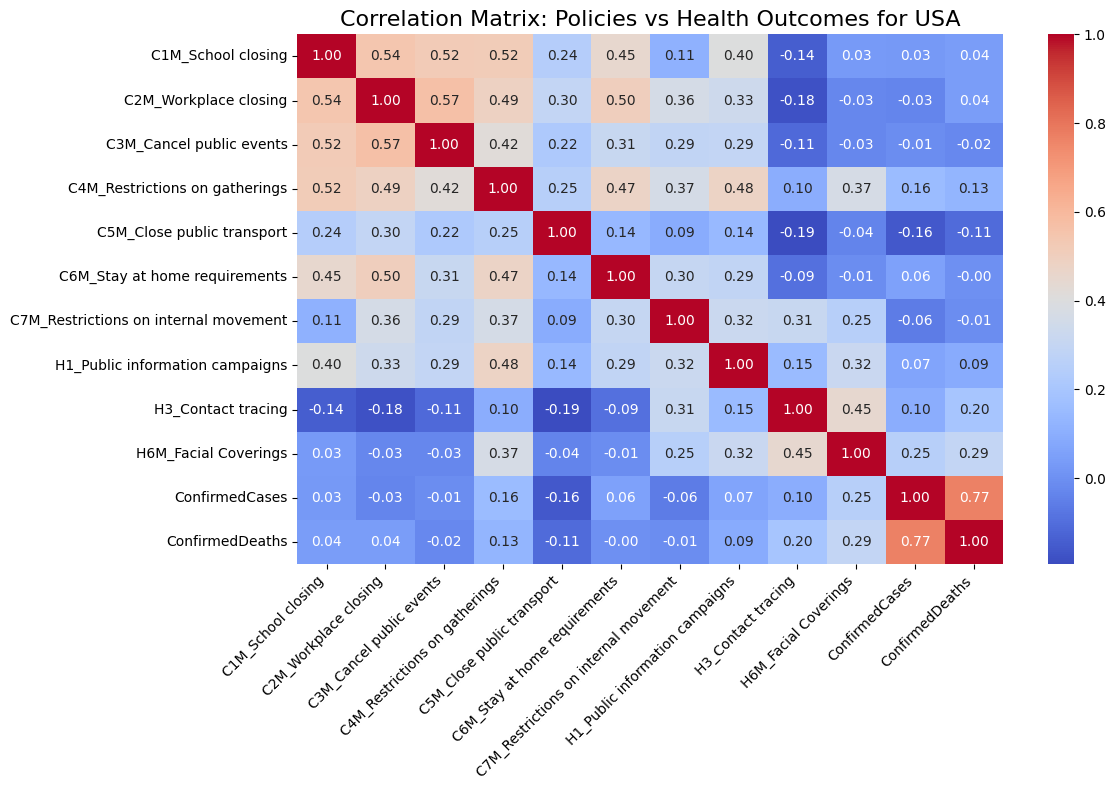

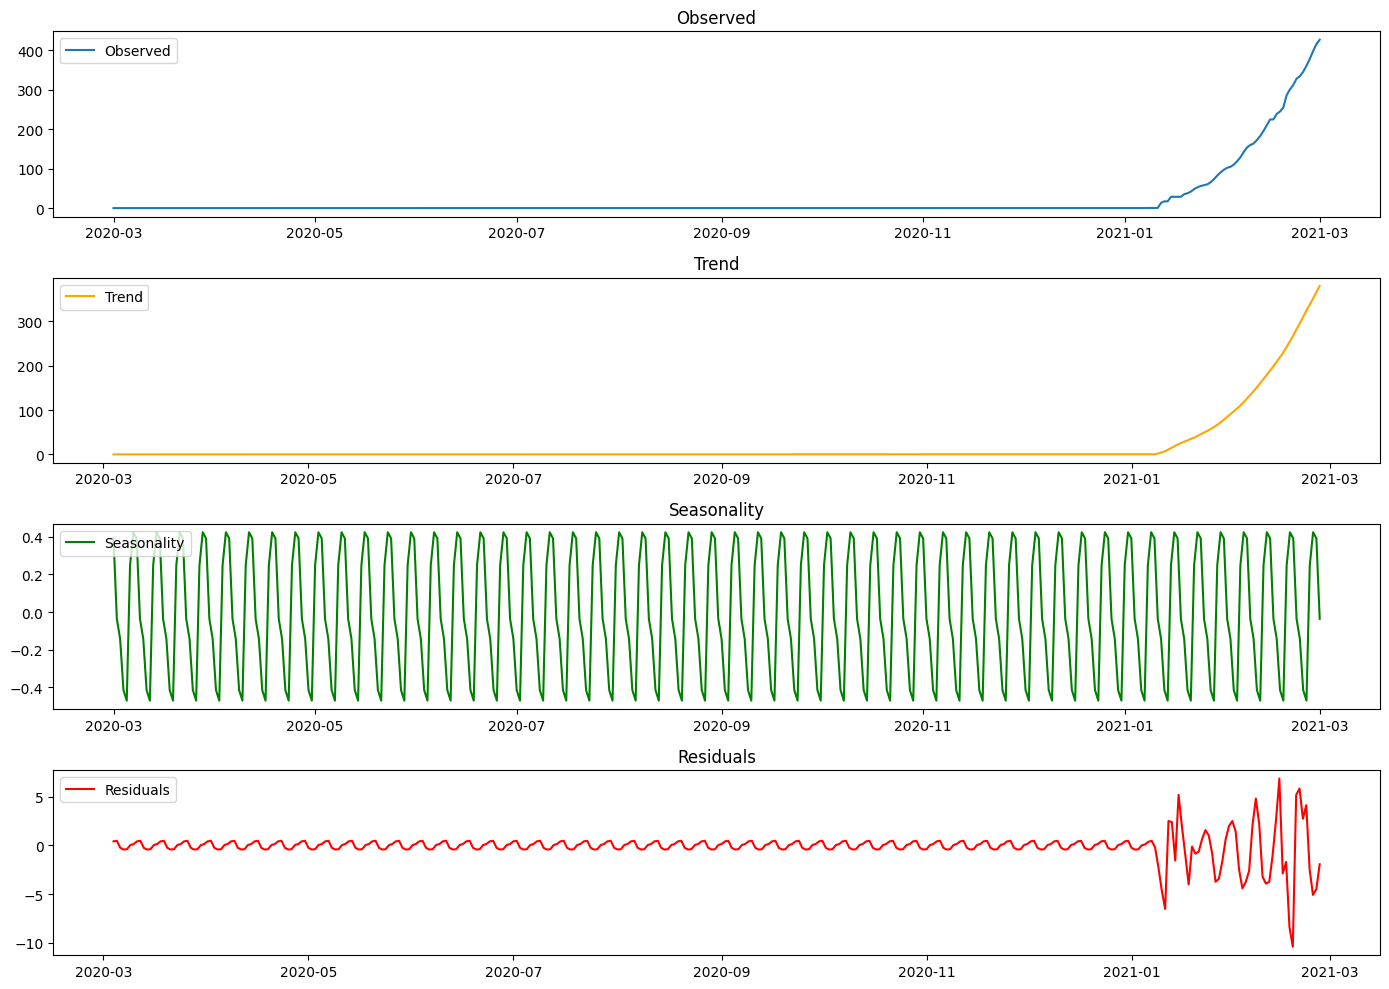

Trend Component Summary:
count    360.000000
mean      18.822663
std       62.702922
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      379.700000
Name: trend, dtype: float64

Seasonal Component Summary:
count    366.000000
mean       0.000971
std        0.340339
min       -0.470658
25%       -0.414614
50%       -0.036021
75%        0.391458
max        0.424119
Name: seasonal, dtype: float64

Residual Component Summary:
count    360.000000
mean      -0.097172
std        1.410115
min      -10.407914
25%       -0.391458
50%        0.036021
75%        0.414614
max        6.861399
Name: resid, dtype: float64


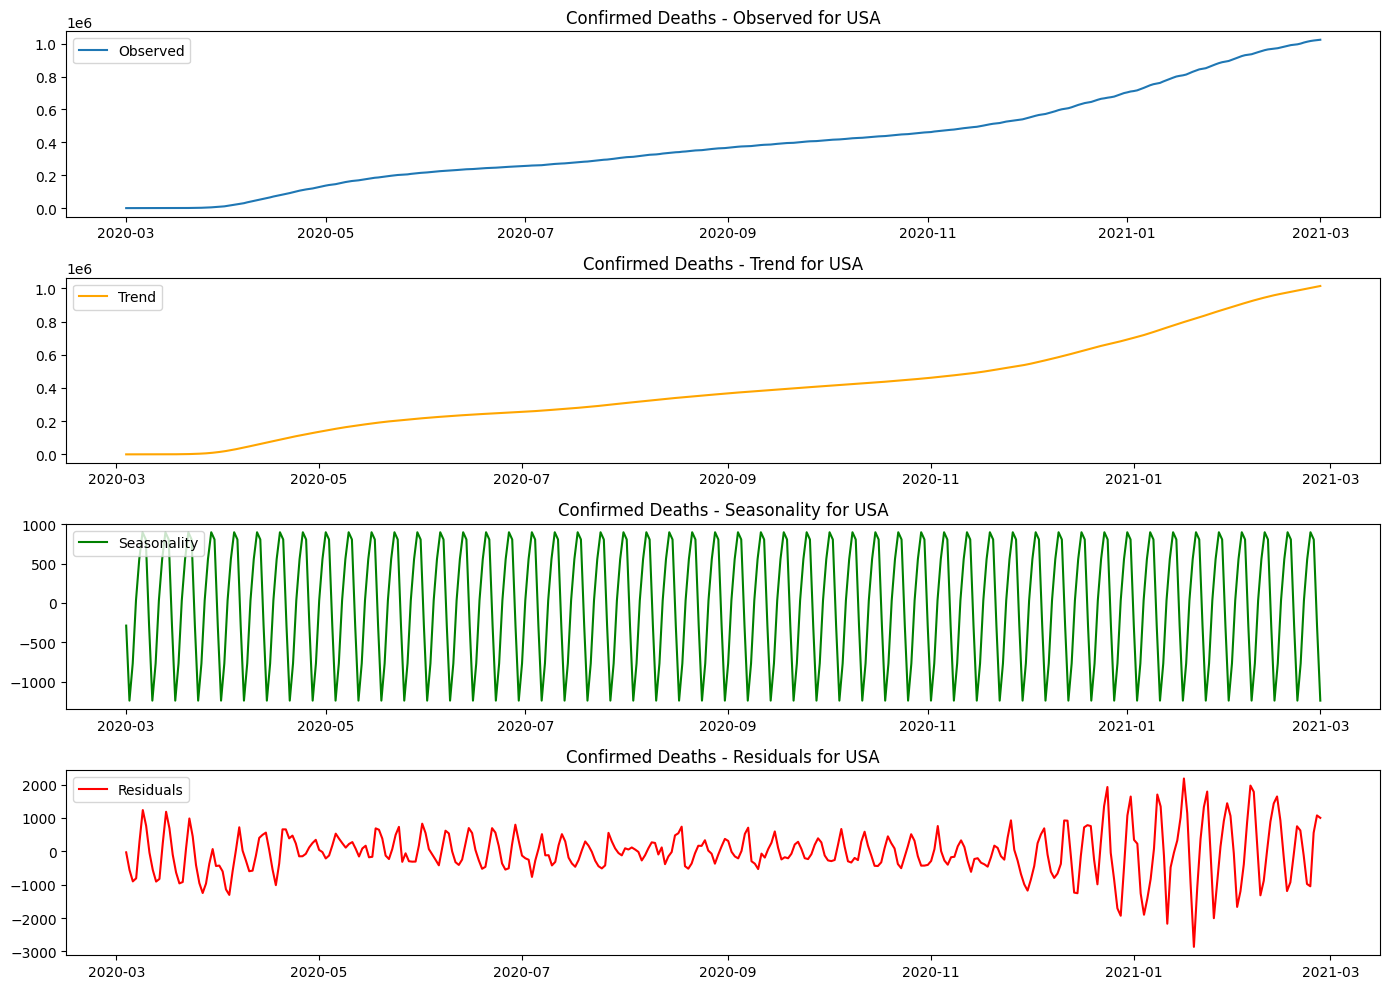

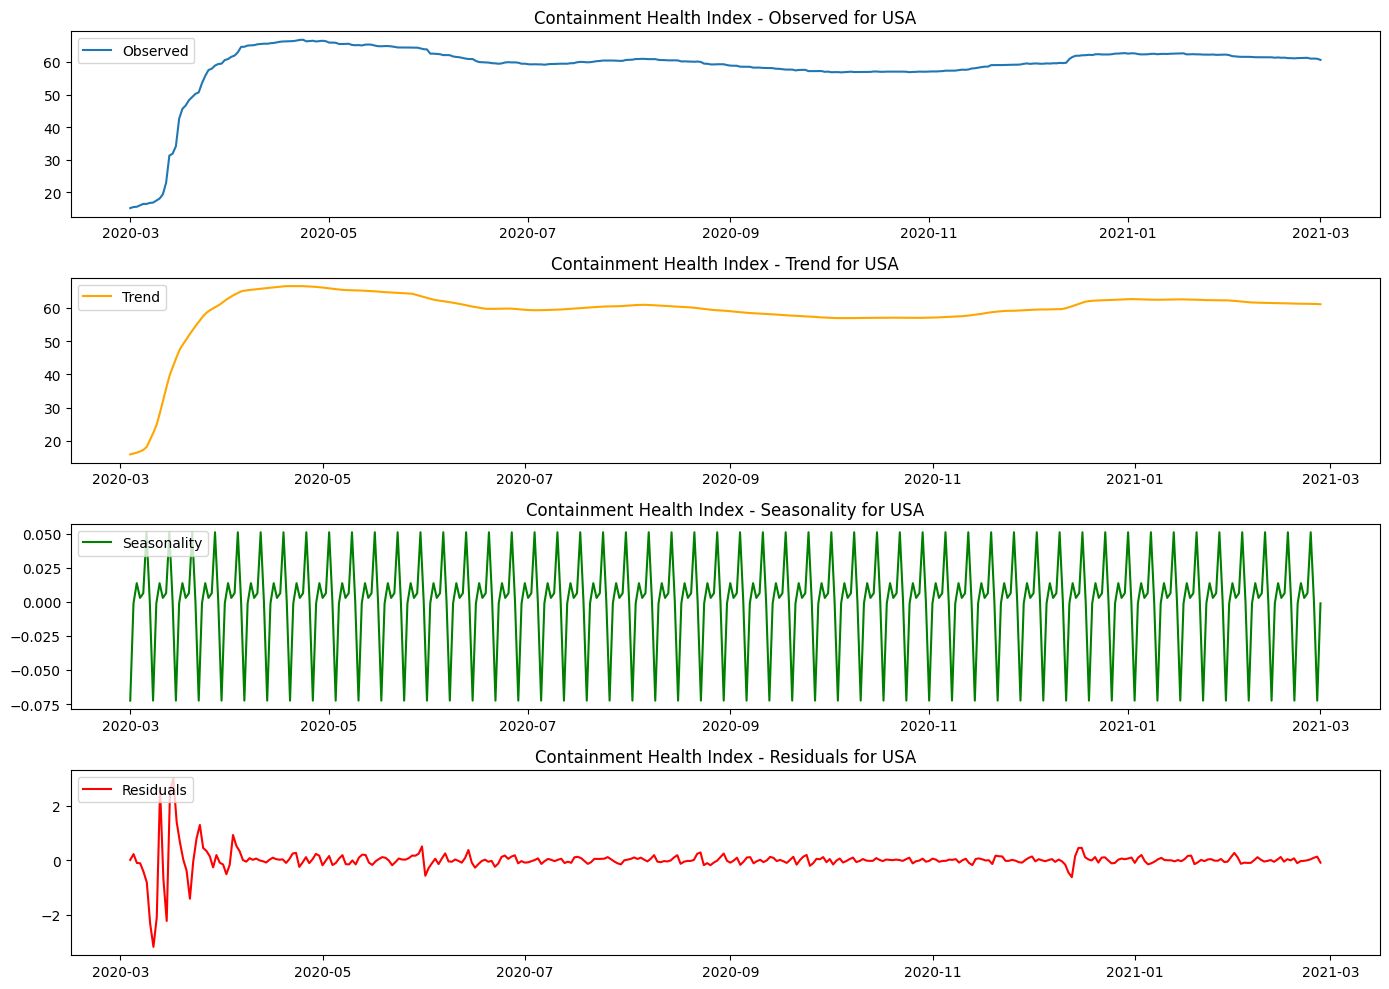

Deaths Trend Component Summary:
count    3.600000e+02
mean     3.976835e+05
std      2.675890e+05
min      2.042857e+01
25%      2.188321e+05
50%      3.651447e+05
75%      5.358154e+05
max      1.014369e+06
Name: trend, dtype: float64

Containment Index Trend Component Summary:
count    360.000000
mean      59.206050
std        7.756110
min       15.910055
25%       58.252500
50%       60.258695
75%       62.382232
max       66.565824
Name: trend, dtype: float64


<ipython-input-4-0c682500e3a3>:288: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  state_aggregated['CaseFatalityRate'].replace([float('inf'), -float('inf')], 0, inplace=True)


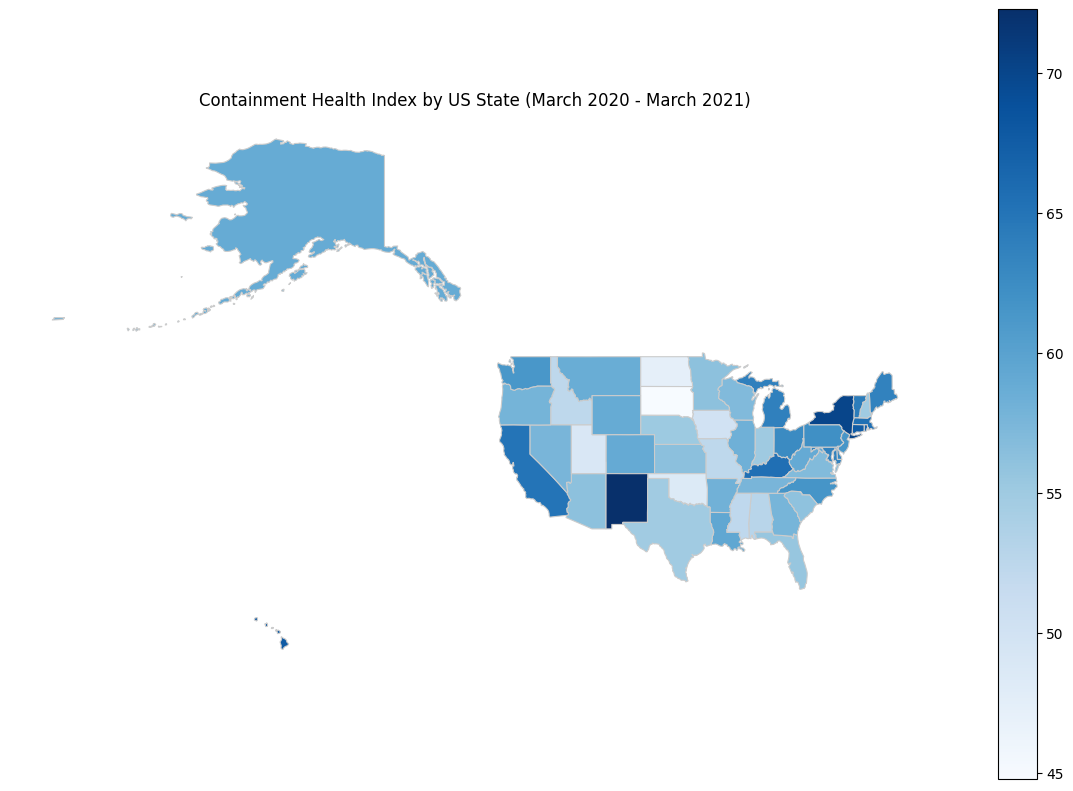

In [ ]:
#df.isnull().sum()
#check missing data for a column: df[column_name].isnull()
#dropna()
#dropna(thresh=10) - have at least 10 is null values
#dropna(axis) - drop either the column or row
#Mean val: df[column].mean()
#Median val: df[column].median()
#Mode val: df[column].mode()
#dataframe.duplicated() or dataframe.duplicated().any() - finds duplicate data
#dataframe[colume].isUnique
#Outliers - find standard deviation and IQ Range
from google.colab import files
uploaded = files.upload()
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import geopandas as gpd

import pandas as pd

df = pd.read_csv('Data - US.csv', parse_dates=['Date'])

start_date = '2020-03-01'
end_date = '2021-03-01'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

if df['Date'].isna().any():
    print("Invalid dates found. Correct them before plotting!")

df = df.drop('C1M_Flag', axis=1)
df = df.drop('C2M_Flag', axis=1)
df = df.drop('C3M_Flag', axis=1)
df = df.drop('C4M_Flag', axis=1)
df = df.drop('C5M_Flag', axis=1)
df = df.drop('C6M_Flag', axis=1)
df = df.drop('C7M_Flag', axis=1)
df = df.drop('E1_Flag', axis=1)
df = df.drop('H1_Flag', axis=1)
df = df.drop('H7_Flag', axis=1)
df = df.drop('E1_Income support',axis=1)
df = df.drop('E2_Debt/contract relief', axis=1)
df = df.drop('E3_Fiscal measures', axis = 1)
df = df.drop('E4_International support', axis=1)
df = df.drop('H8M_Protection of elderly people', axis=1)
df = df.drop('M1_Wildcard', axis=1)
df = df.drop('MajorityVaccinated', axis=1)
df = df.drop('EconomicSupportIndex', axis=1)
df = df.drop('EconomicSupportIndex_ForDisplay', axis=1)

print(df.head())
print(df.info())

print(df.describe())

subset_states = [
    'New Mexico', 'New York', 'Hawaii', 'Connecticut', 'Rhode Island', 'Massachusetts',
    'Kentucky', 'Washington DC', 'California','Vermont', 'Michigan', 'Maryland','Maine',
    'Delaware','Ohio','Washington','Pennsylvania','New Jersey','North Carolina','Louisiana'
]
subset_data = df[df['RegionName'].isin(subset_states)]

df.isnull().sum()
df.duplicated()
df['GovernmentResponseIndex_Average_ForDisplay'].mean()

# Define subplot grid
n_states = len(subset_states)
rows = (n_states // 2) + (n_states % 2)
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3))
axes = axes.flatten()

for i, state in enumerate(subset_states):
    ax = axes[i]
    state_data = subset_data[subset_data['RegionName'] == state]

    if not state_data.empty:
        ax.step(state_data['Date'], state_data['C1M_School closing'], label="C1 (School Closing)", color="blue", where="mid")
        ax.step(state_data['Date'], state_data['C2M_Workplace closing'], label="C2 (Work Closing)", color="red", where="mid")
        ax.step(state_data['Date'], state_data['C6M_Stay at home requirements'], label="C6 (Stay at Home)", color="green", where="mid")

        ax2 = ax.twinx()
        ax2.plot(state_data['Date'], state_data['ConfirmedCases'], label="Confirmed Cases", color="purple", linestyle='-', alpha=0.7)
        ax2.set_ylabel("Confirmed Cases", color="purple", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="purple")

    else:
        ax.text(0.5, 0.5, "No data available", fontsize=12, ha='center', va='center')

    ax.set_title(state, fontsize=10)
    ax.set_ylabel("Policy Level (1-3)")
    ax.set_xlabel("Date")
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.tick_params(axis='x', rotation=45)
    ax.legend(fontsize=8)

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, fontsize=8, loc="upper left")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


state_data = df.dropna(subset=['RegionName'])
state_filtered_data = state_data[
    (state_data['Date'] >= pd.to_datetime('2020-03-01')) & (state_data['Date'] <= pd.to_datetime('2021-03-31'))
]


state_aggregated = state_filtered_data.groupby('RegionName').agg({
    'ContainmentHealthIndex_Average': 'mean',
    'ConfirmedCases': 'max',
    'ConfirmedDeaths': 'max'
}).reset_index()

state_aggregated['CaseFatalityRate'] = state_aggregated['ConfirmedDeaths'] / state_aggregated['ConfirmedCases']
state_aggregated = state_aggregated.sort_values(by='ContainmentHealthIndex_Average', ascending=False).head(20)

top_states = state_aggregated['RegionName']
top_states_data = state_filtered_data[state_filtered_data['RegionName'].isin(top_states)]

correlation_data = top_states_data[
    [
        'C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
        'C4M_Restrictions on gatherings', 'C5M_Close public transport',
        'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
        'H1_Public information campaigns', 'H3_Contact tracing', 'H6M_Facial Coverings',
        'ConfirmedCases', 'ConfirmedDeaths'
    ]
]

correlation_data = correlation_data.dropna()

correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
    xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns
)
plt.title('Correlation Matrix: Policies vs Health Outcomes for USA', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

subset_data = df[['Date', 'PopulationVaccinated']].groupby('Date').sum().reset_index()

# Decompose the time series
decomposition = seasonal_decompose(subset_data.set_index('Date')['PopulationVaccinated'], model='additive')

# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("Trend Component Summary:")
print(decomposition.trend.describe())
print("\nSeasonal Component Summary:")
print(decomposition.seasonal.describe())
print("\nResidual Component Summary:")
print(decomposition.resid.describe())

df_grouped = df.groupby('Date').agg({
    'ConfirmedDeaths': 'sum',
    'ContainmentHealthIndex_Average': 'mean'
}).reset_index()


df_grouped = df_grouped.set_index('Date').resample('D').agg({
    'ConfirmedDeaths': 'sum',
    'ContainmentHealthIndex_Average': 'mean'
}).reset_index()

decomposition_deaths = seasonal_decompose(df_grouped.set_index('Date')['ConfirmedDeaths'], model='additive')

decomposition_index = seasonal_decompose(df_grouped.set_index('Date')['ContainmentHealthIndex_Average'], model='additive')

# components for ConfirmedDeaths
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition_deaths.observed, label='Observed')
plt.title('Confirmed Deaths - Observed for USA')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition_deaths.trend, label='Trend', color='orange')
plt.title('Confirmed Deaths - Trend for USA')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition_deaths.seasonal, label='Seasonality', color='green')
plt.title('Confirmed Deaths - Seasonality for USA')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition_deaths.resid, label='Residuals', color='red')
plt.title('Confirmed Deaths - Residuals for USA')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# components for ContainmentHealthIndex_Average
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition_index.observed, label='Observed')
plt.title('Containment Health Index - Observed for USA')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition_index.trend, label='Trend', color='orange')
plt.title('Containment Health Index - Trend for USA')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition_index.seasonal, label='Seasonality', color='green')
plt.title('Containment Health Index - Seasonality for USA')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition_index.resid, label='Residuals', color='red')
plt.title('Containment Health Index - Residuals for USA')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("Deaths Trend Component Summary:")
print(decomposition_deaths.trend.describe())
print("\nContainment Index Trend Component Summary:")
print(decomposition_index.trend.describe())

df = pd.read_csv('Data - US.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

start_date = '2020-03-01'
end_date = '2021-03-01'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

drop_columns = ['C1M_Flag', 'C2M_Flag', 'C3M_Flag', 'C4M_Flag', 'C5M_Flag', 'C6M_Flag', 'C7M_Flag',
                'E1_Flag', 'H1_Flag', 'H7_Flag', 'E1_Income support', 'E2_Debt/contract relief', 'E3_Fiscal measures',
                'E4_International support', 'H8M_Protection of elderly people', 'M1_Wildcard', 'MajorityVaccinated',
                'EconomicSupportIndex', 'EconomicSupportIndex_ForDisplay']
existing_columns = [col for col in drop_columns if col in df.columns]
df = df.drop(columns=existing_columns)

state_data = df.dropna(subset=['RegionName'])

state_aggregated = state_data.groupby('RegionName').agg({
    'ContainmentHealthIndex_Average': 'mean',
    'ConfirmedCases': 'max',
    'ConfirmedDeaths': 'max'
}).reset_index()

state_aggregated['CaseFatalityRate'] = state_aggregated['ConfirmedDeaths'] / state_aggregated['ConfirmedCases']
state_aggregated['CaseFatalityRate'].replace([float('inf'), -float('inf')], 0, inplace=True)


us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

us_states = us_states.rename(columns={'name': 'RegionName'})
map_data = us_states.merge(state_aggregated, on='RegionName', how='left')

# Plot geospatial map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map_data.plot(column='ContainmentHealthIndex_Average', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Containment Health Index by US State (March 2020 - March 2021)')
plt.axis('off')
plt.show()